In [10]:
import sys
sys.path.append("../dataprocessing")
import numpy as np
import os
import PIL
import PIL.Image
from PIL import ImageDraw
import tensorflow as tf
# import tensorflow_datasets as tfds
import pandas as pd
from tqdm import tqdm
import random
import data_process
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [4]:
landmarks = pd.read_csv('../data/images/202208.20172106650/202208.20172106650.csv')

In [12]:
def make_flow_chart(data):
    fig, ax = plt.subplots(figsize = (20,10))
    temp_plot = sns.lineplot(data = data, ax=ax, markers=True, dashes=False)
    # ax[idx, col].set_title(str(idx) +" 번 클러스터")
    # if col==0:        
    #     ax[idx, col].set_ylabel(list(custom_sort.keys())[idx])
    #     ax[idx, col].yaxis.label.set_size(20)
    # ax[idx].set_ylabel(list(custom_sort.keys())[idx] + " group")
    # ax[idx].set_xticks(list(range(1,len(seq)+1)))
    # if idx==0:
    #     ax[idx].set_title(str(col+1) +" 주차")
    # for bar in temp_plot.patches:
    #     ax[idx].annotate(int(bar.get_height()), # 천단위 콤마 표시
    #                 (bar.get_x() + bar.get_width() / 2,
    #                 bar.get_height()), ha='center', va='center',
    #                 size=10, xytext=(0, 3),
    #                 textcoords='offset points')
    # for row in data.iterrows():
    #     ax[idx].text(row[0], int(row[1]['quiz']), int(row[1]['quiz']), fontsize=12, ha='center') 
    #     ax[idx].text(row[0], int(row[1]['proj']), int(row[1]['proj']), fontsize=12, ha='center')

In [18]:
[point for point in landmarks_cut.columns if str(0) == point.split('-')[0]]

[]

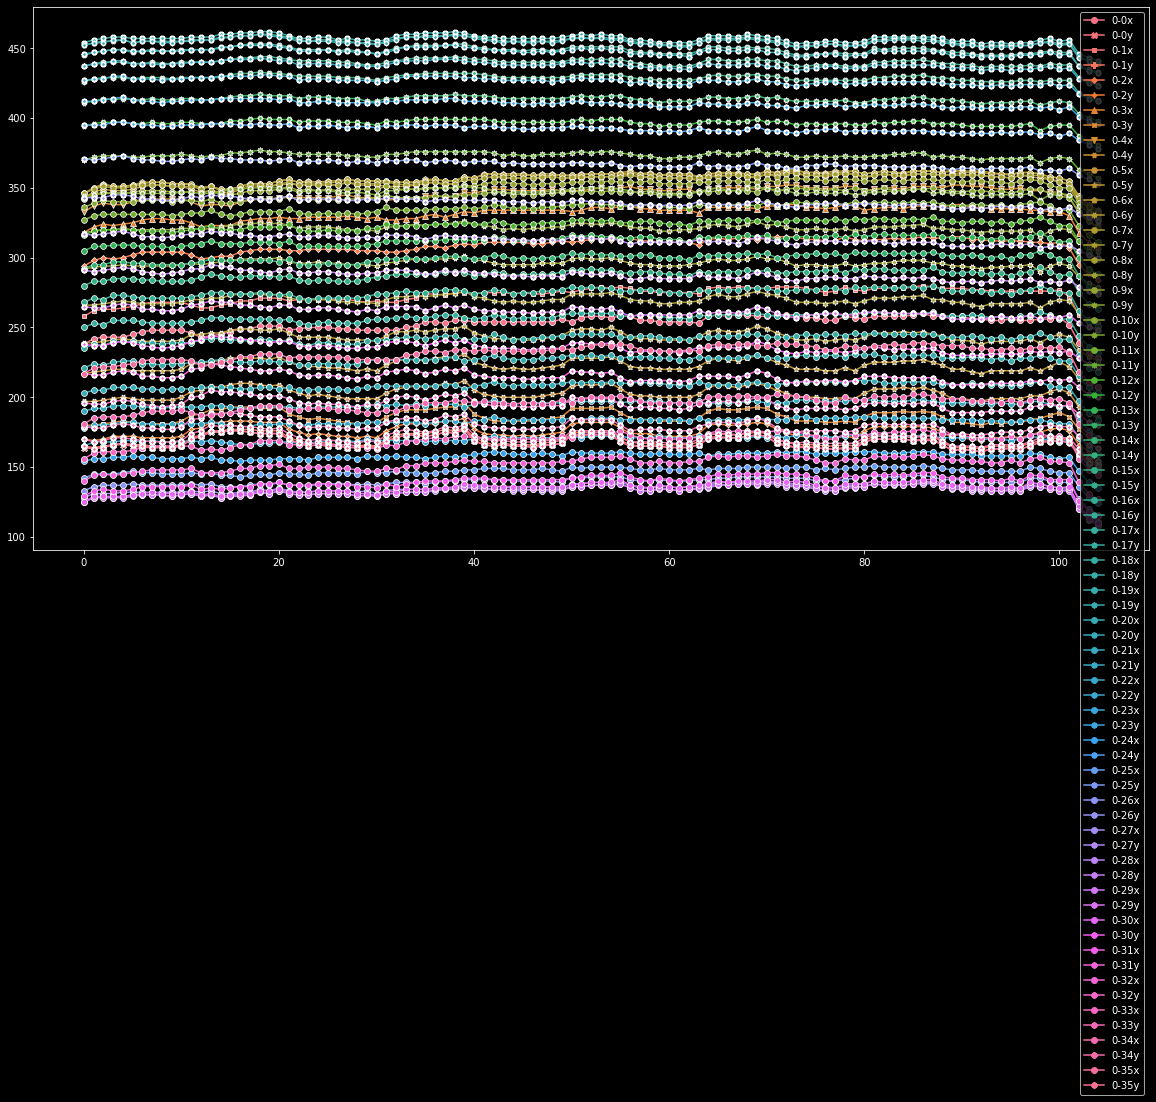

In [20]:
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point]]
landmarks_cut2 =  landmarks_cut[[point for point in landmarks_cut.columns if str(0) == point.split('-')[0]]]
make_flow_chart(landmarks_cut2)

In [3]:
# plt에서 rgb 반대로 나와서 변환처리 필요
def show_img(idx):
    img = cv2.imread('../data/images/202208.16173256779+0/0.0.jpg', cv2.IMREAD_COLOR)
    drawing_image = img.copy()
    order = 0
    landmark_points = [point for point in landmarks.columns if str(idx) == point.split('-')[0]]
    for p in range(0, len(landmark_points), 2):
        radius = 2
        x = landmarks.iloc[order][landmark_points[p]]
        y = landmarks.iloc[order][landmark_points[p+1]]
        # print(x,y)
        cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=3, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    # img_show(drawing_image)
    print(landmark_points)
    left = landmarks.iloc[order]['left']
    top = landmarks.iloc[order]['top']
    right = landmarks.iloc[order]['right']
    bottom = landmarks.iloc[order]['bottom']
    plt.subplots(figsize=(15,15))
    # cv2.rectangle(drawing_image, (int(left), int(top)), (int(right), int(bottom)), (255, 255, 0), 3)
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

,frame,top,bottom,left,right,0-0x,0-0y,0-1x,0-1y,0-2x,...,6y,7x,7y,9x,9y,10x,10y,11x,11y,time_diff
0,0.0,153.0,444.0,92.0,383.0,238.0,164.0,258.0,165.0,294.0,...,333.850830,315.733612,345.131775,350.220825,296.740204,296.156586,265.218323,277.400848,393.934113,0.0
1,1.0,148.0,444.0,92.0,388.0,242.0,163.0,262.0,164.0,298.0,...,333.529877,320.449341,344.201904,352.312103,299.367554,300.559357,265.428741,279.763702,395.008179,96.0
2,2.0,149.0,449.0,90.0,390.0,243.0,164.0,263.0,165.0,300.0,...,334.905426,319.995148,346.647034,355.043884,298.644989,300.331573,267.232727,281.126709,395.746307,108.0
3,3.0,148.0,444.0,92.0,388.0,243.0,166.0,263.0,166.0,299.0,...,336.128998,321.059662,346.468781,354.858459,295.332520,301.194000,267.843414,282.519989,395.330963,120.0
4,4.0,148.0,444.0,92.0,388.0,243.0,166.0,264.0,167.0,300.0,...,335.205139,320.487549,347.499451,356.244049,296.451416,301.599609,268.632202,281.100891,397.864868,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100.0,134.0,444.0,95.0,405.0,257.0,169.0,277.0,171.0,311.0,...,332.686188,323.380463,347.155334,359.105011,291.992432,304.440430,270.788116,286.906830,391.816986,101.0
101,101.0,138.0,444.0,95.0,400.0,252.0,168.0,272.0,169.0,307.0,...,332.263733,321.996490,347.208038,357.847382,296.780457,304.906555,267.985779,281.605011,393.275391,97.0
102,102.0,141.0,431.0,92.0,378.0,239.0,159.0,259.0,160.0,295.0,...,327.255798,312.146881,338.583038,344.243134,287.338165,293.768677,258.653076,271.939117,387.269836,99.0
103,103.0,140.0,427.0,87.0,368.0,231.0,153.0,252.0,155.0,288.0,...,323.598572,304.654755,334.134766,338.967285,284.106812,286.427979,254.632141,264.991669,383.570557,104.0
